In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_validation
from sklearn.model_selection import train_test_split

# 使用 scikit-learn 自带的一个糖尿病病人的数据集
diabetes = datasets.load_diabetes()  
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                     diabetes.target,
                                                     test_size=0.25, 
                                                     random_state=0) 
print(X_train.shape)
print(X_train[:3])

(331, 10)
[[-0.04910502 -0.04464164 -0.05686312 -0.04354219 -0.04559945 -0.04327577
   0.00077881 -0.03949338 -0.01190068  0.01549073]
 [-0.05273755 -0.04464164 -0.05578531 -0.03665645  0.08924393 -0.00319277
   0.00814208  0.03430886  0.13237265  0.00306441]
 [-0.09269548  0.05068012 -0.0902753  -0.05731367 -0.02496016 -0.03043668
  -0.00658447 -0.00259226  0.02405258  0.00306441]]


E:\software\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
regr = linear_model.Ridge()# 默认 alphas = 1.0
regr.fit(X_train, y_train)
print('权重系数:', regr.coef_)
print('\n常数项:', regr.intercept_) # intercept 翻译为 截距
mse = np.mean((regr.predict(X_test) - y_test) ** 2)
print("\nMSE:", mse)
print('\nScore:', regr.score(X_test, y_test))

权重系数: [  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017]

常数项: 152.4477761489962

MSE: 3192.3285539937624

Score: 0.35695757658096805


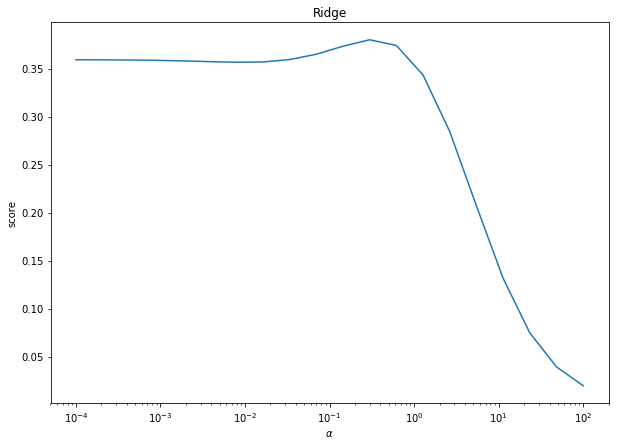

In [3]:
def test_Ridge_alpha(*data):
    '''
    测试 Ridge 的预测性能随 alpha 参数的影响
    '''
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-4, 2, 20)
    scores = []
    for i, alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    plt.show()

test_Ridge_alpha(X_train, X_test, y_train, y_test)